# Index

* <a href="#1" style="color: blue;">Importing Libraries</a>
* <a href="#2" style="color: blue;">Loading Dataset</a>
* <a href="#3" style="color: blue;">Data Visualization</a>
* <a href="#4" style="color: blue;">Data Preprocessing</a>
* <a href="#5" style="color: blue;">Analyzing the Data</a>
* <a href="#6" style="color: blue;">Vectorization and Splitting the data</a>
* <a href="#7" style="color: blue;">Model Building</a>
* <a href="#8" style="color: blue;">Logistic Regression</a>
* <a href="#9" style="color: blue;">Linear SVM</a>
* <a href="#10" style="color: blue;">Random Forest</a>
* <a href="#11" style="color: blue;">Naive Bayes</a>
* <a href="#12" style="color: blue;">RNN</a>
* <a href="#13" style="color: blue;">Model Saving, Loading and Prediction</a>

# Importing libraries <a id="1"></a>

In [1]:
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset <a id="2"></a>

In [5]:
# Construct a tf.data.Dataset
data = pd.read_csv('/content/drive/MyDrive/Tweeets1.6.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [8]:
data = data.sample(frac=1)
data = data[:2000]

In [9]:
data.shape

(2000, 6)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Visualization <a id="3"></a>

In [10]:
print("Dataset shape:", data.shape)

Dataset shape: (2000, 6)


In [11]:
data.head(10)

,polarity,id,date,query,user,text
15308,0,1554077500,Sat Apr 18 16:00:23 PDT 2009,NO_QUERY,RussellCourtney,Just Joined Twitter!! Sooo Confused!!
653778,0,2239052215,Fri Jun 19 08:04:20 PDT 2009,NO_QUERY,beer13,"@mcflyharry great song, but...not the beatles ..."
947920,4,1823223947,Sat May 16 21:24:58 PDT 2009,NO_QUERY,The_PHP_Jedi,ZOMFG!! The Pirate Bay now has an official the...
185533,0,1968086212,Fri May 29 20:44:03 PDT 2009,NO_QUERY,snazzshazz,goodbye exams. HELLO weekend! ive had a rotten...
703746,0,2255806501,Sat Jun 20 11:49:06 PDT 2009,NO_QUERY,lisar,At my first ever baby shower. I've already be...
906401,4,1695407739,Mon May 04 06:03:32 PDT 2009,NO_QUERY,Fallen_Angel69,"Got up late,yet still managed to do housework ..."
707877,0,2257135010,Sat Jun 20 13:51:04 PDT 2009,NO_QUERY,AngelGetsCrazy,@tracecyrus http://twitpic.com/7xor6 - I can't...
1054667,4,1962044320,Fri May 29 10:26:14 PDT 2009,NO_QUERY,needsomeair,had white chocolate mocha frap just now http:...
684284,0,2250490184,Sat Jun 20 00:39:44 PDT 2009,NO_QUERY,MissRavenLynn,Long night! I feel terrible because I didn't e...
633761,0,2233102081,Thu Jun 18 20:50:13 PDT 2009,NO_QUERY,ejsgirl,@stefanodimera i really do likeyou stephano i ...


In [12]:
data['polarity'].unique()

array([0, 4])

In [13]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
15308,0,1554077500,Sat Apr 18 16:00:23 PDT 2009,NO_QUERY,RussellCourtney,Just Joined Twitter!! Sooo Confused!!
653778,0,2239052215,Fri Jun 19 08:04:20 PDT 2009,NO_QUERY,beer13,"@mcflyharry great song, but...not the beatles ..."
947920,1,1823223947,Sat May 16 21:24:58 PDT 2009,NO_QUERY,The_PHP_Jedi,ZOMFG!! The Pirate Bay now has an official the...
185533,0,1968086212,Fri May 29 20:44:03 PDT 2009,NO_QUERY,snazzshazz,goodbye exams. HELLO weekend! ive had a rotten...
703746,0,2255806501,Sat Jun 20 11:49:06 PDT 2009,NO_QUERY,lisar,At my first ever baby shower. I've already be...


In [14]:
data.describe()

,polarity,id
count,2000.000000,2.000000e+03
mean,0.504500,1.998173e+09
std,0.500105,1.942913e+08
min,0.000000,1.467860e+09
25%,0.000000,1.956396e+09
50%,1.000000,2.001354e+09
75%,1.000000,2.177020e+09
max,1.000000,2.328675e+09


In [15]:
# check the number of positive vs. negative
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         2000
No. of positve tagged sentences is:  1009
No. of negative tagged sentences is: 991


In [17]:
# get a word count per of text
def word_count(words):
    return len(words.split())

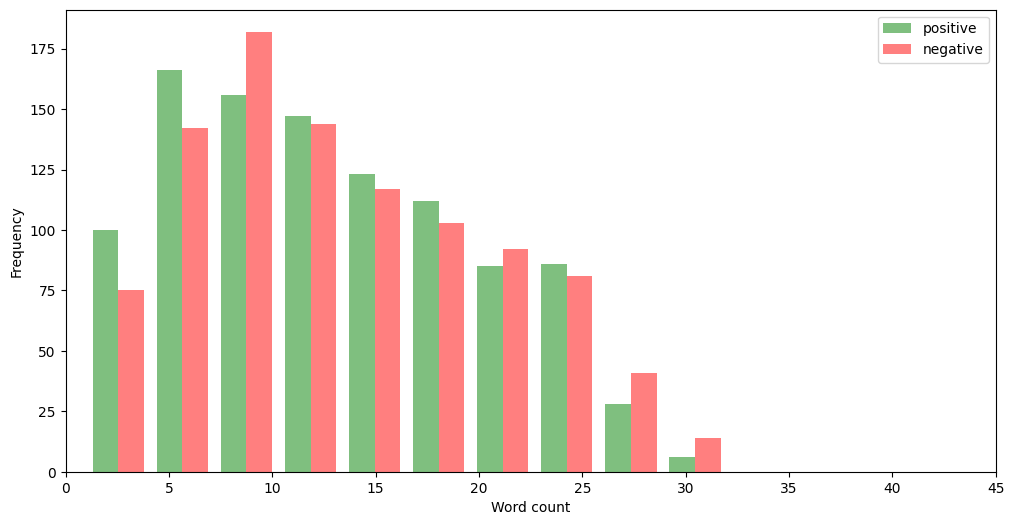

In [18]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [19]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 688),
 ('and', 380),
 ('you', 310),
 ('for', 261),
 ('have', 187),
 ('but', 174),
 ("i'm", 168),
 ('that', 163),
 ('with', 152),
 ('just', 140),
 ('was', 126),
 ('not', 119),
 ('this', 114),
 ('all', 110),
 ('get', 106),
 ('good', 102),
 ('are', 92),
 ("it's", 91),
 ('going', 88),
 ('out', 84)]

# Data Processing <a id="4"></a>

In [21]:
data

,polarity,id,date,query,user,text,word count
15308,0,1554077500,Sat Apr 18 16:00:23 PDT 2009,NO_QUERY,RussellCourtney,Just Joined Twitter!! Sooo Confused!!,5
653778,0,2239052215,Fri Jun 19 08:04:20 PDT 2009,NO_QUERY,beer13,"@mcflyharry great song, but...not the beatles ...",22
947920,1,1823223947,Sat May 16 21:24:58 PDT 2009,NO_QUERY,The_PHP_Jedi,ZOMFG!! The Pirate Bay now has an official the...,16
185533,0,1968086212,Fri May 29 20:44:03 PDT 2009,NO_QUERY,snazzshazz,goodbye exams. HELLO weekend! ive had a rotten...,21
703746,0,2255806501,Sat Jun 20 11:49:06 PDT 2009,NO_QUERY,lisar,At my first ever baby shower. I've already be...,14
...,...,...,...,...,...,...,...
550825,0,2203009253,Tue Jun 16 22:50:39 PDT 2009,NO_QUERY,WrecksGirl,@gellengail I didn't get any email from school...,22
334848,0,2013660033,Tue Jun 02 23:14:04 PDT 2009,NO_QUERY,TinyArk,@joughdee aww sorry it was @exiledblog ... Wh...,12
840527,1,1559772924,Sun Apr 19 12:00:42 PDT 2009,NO_QUERY,aplomo,wire to wire... Just chilling and enjoying my ...,9
1512012,1,2175171305,Mon Jun 15 00:16:06 PDT 2009,NO_QUERY,RULERDIVINE,@Prod_By_BLACKK,1


In [23]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [24]:
data.drop('id', axis=1, inplace=True)

In [25]:
data.head(10)

,polarity,text
15308,0,Just Joined Twitter!! Sooo Confused!!
653778,0,"@mcflyharry great song, but...not the beatles ..."
947920,1,ZOMFG!! The Pirate Bay now has an official the...
185533,0,goodbye exams. HELLO weekend! ive had a rotten...
703746,0,At my first ever baby shower. I've already be...
906401,1,"Got up late,yet still managed to do housework ..."
707877,0,@tracecyrus http://twitpic.com/7xor6 - I can't...
1054667,1,had white chocolate mocha frap just now http:...
684284,0,Long night! I feel terrible because I didn't e...
633761,0,@stefanodimera i really do likeyou stephano i ...


In [26]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [27]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [28]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'does', 'the', "you're", 'in', 'who', 'hers', 'whom', 'wouldn', "mightn't", "won't", 'above', 'to', 'against', 'itself', 've', 'an', 'ma', 'on', 'ourselves', 'both', 'll', 'been', 'yourself', 'do', 'until', 'doing', 'they', 'with', 'was', 'yourselves', 'm', 'yours', 'she', 'as', 'most', "needn't", 'hasn', 'doesn', "you'll", 'of', 'myself', 'his', 'just', 'only', 'this', 'into', 'i', 'ain', 'haven', 'or', 'herself', 'your', 'and', 'after', 'then', 'all', 'have', 'theirs', 'has', 'more', 'than', "wasn't", 'don', 'now', 'again', 'is', 'having', 'own', 's', 'mustn', 'some', "you've", 'for', "couldn't", 'by', 'he', 'her', 'am', 'there', 'him', 'other', 'be', "hasn't", 'below', 'why', 'which', 'about', 'through', 'shan', 'won', "don't", "she's", 'few', 'no', 'what', 'these', 'were', "weren't", 'once', 'nor', 'over', 'while', 'very', 'before', "that'll", 'where', 'themselves', 'when', 'are', 'being', 'off', 'same', 'o', 'those', 'should', "haven't", 'from', 'hadn', 'here', 'at', 'such', 'the

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

> The Preprocessing steps taken are:

* Lower Casing: Each text is converted to lowercase.
* Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

* Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")
* Removing Short Words: Words with length less than 2 are removed.
* Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
* Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [30]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [31]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [32]:
data.head(10)

,polarity,text,processed_tweets
15308,0,Just Joined Twitter!! Sooo Confused!!,ust joined twitter sooo confused
653778,0,"@mcflyharry great song, but...not the beatles ...",mcflyharry great song butnot beatles ahn who u...
947920,1,ZOMFG!! The Pirate Bay now has an official the...,omfg pirate bay official theme song sweetness ...
185533,0,goodbye exams. HELLO weekend! ive had a rotten...,oodbye exam hello weekend ive rotten week some...
703746,0,At my first ever baby shower. I've already be...,first ever baby shower ive already asked im ma...
906401,1,"Got up late,yet still managed to do housework ...",ot lateyet still managed housework time bad go...
707877,0,@tracecyrus http://twitpic.com/7xor6 - I can't...,tracecyrus cant see pic
1054667,1,had white chocolate mocha frap just now http:...,ad white chocolate mocha frap
684284,0,Long night! I feel terrible because I didn't e...,ong night feel terrible didnt eat went work he...
633761,0,@stefanodimera i really do likeyou stephano i ...,stefanodimera really likeyou stephano wee bit ...


# Analyzing the data <a id="5"></a>

> #### Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

### Word-Cloud for Negative tweets.

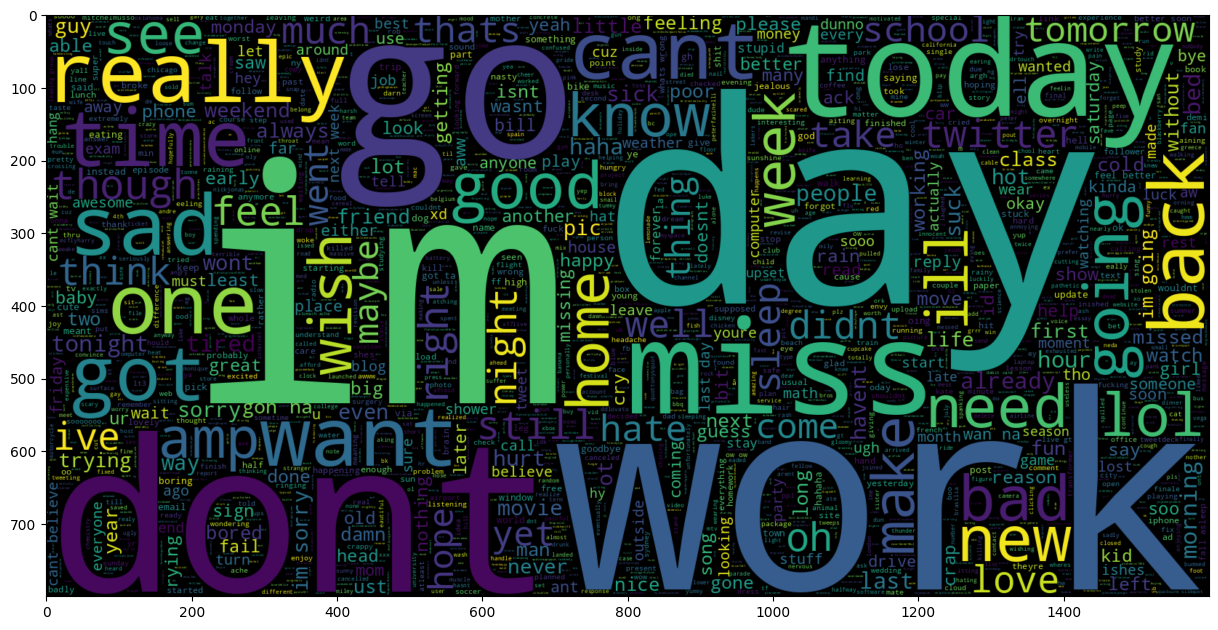

In [33]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

### Word-Cloud for Positive tweets.

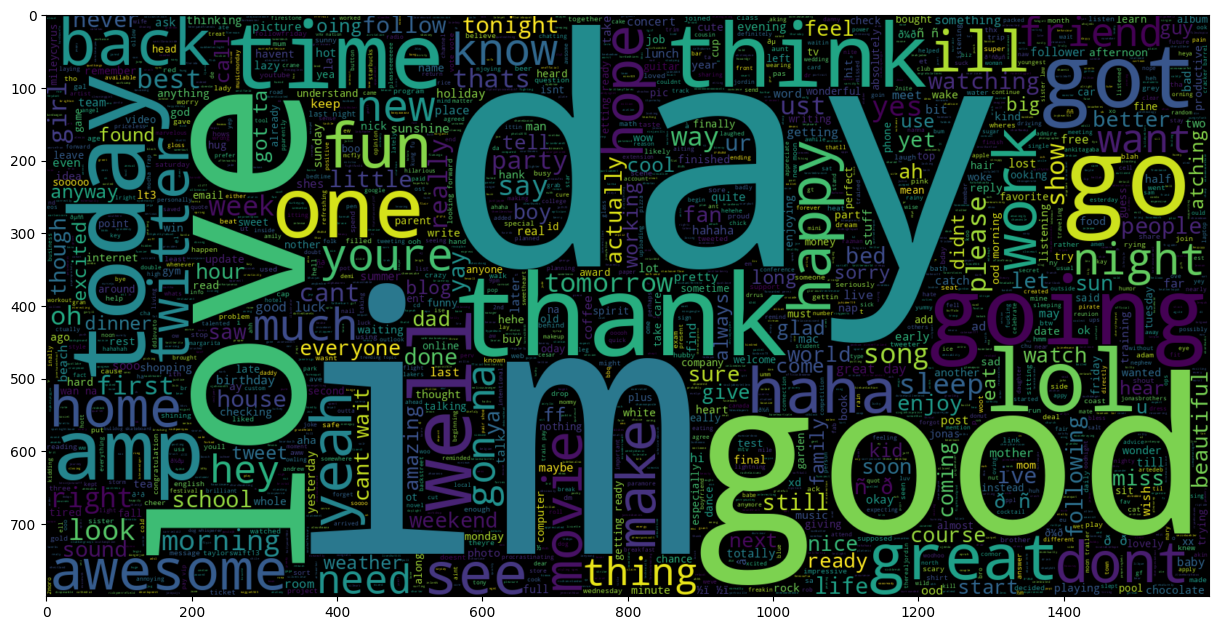

In [34]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

## Vectorization and Splitting the data <a id="6"></a>
Storing input variable-processes_tweets to X and output variable-polarity to y

In [35]:
X = data['processed_tweets'].values
y = data['polarity'].values


In [36]:
print(X.shape)
print(y.shape)

(2000,)
(2000,)


In [42]:
type(data['processed_tweets'])

pandas.core.series.Series

In [43]:
#Convert to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(data['processed_tweets'])
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out() ))

Vector fitted.
No. of feature_words:  5742


In [44]:
print(X.shape)
print(y.shape)

(2000, 5742)
(2000,)


## Split train and test

The Preprocessed Data is divided into 2 sets of data:

* Training Data: The dataset upon which the model would be trained on. Contains 80% data.
* Test Data: The dataset upon which the model would be tested against. Contains 20% data.




In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [46]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1600, 5742)
y_train (1600,)

X_test (400, 5742)
y_test (400,)


# Model Building <a id="7"></a>

### Model evaluating function

In [47]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Logistic Regression <a id="8"></a>

Accuracy of model on training data : 95.875
Accuracy of model on testing data : 66.5 

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       205
           1       0.64      0.73      0.68       195

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.66       400
weighted avg       0.67      0.67      0.66       400



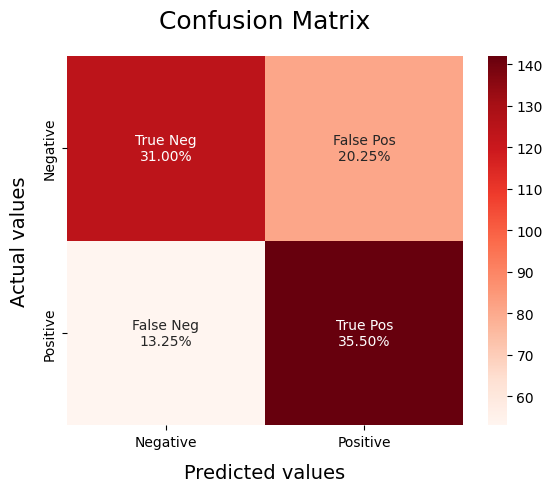

In [48]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

### Linear SVM <a id="9"></a>

Accuracy of model on training data : 99.8125
Accuracy of model on testing data : 66.0 

              precision    recall  f1-score   support

           0       0.70      0.58      0.64       205
           1       0.63      0.74      0.68       195

    accuracy                           0.66       400
   macro avg       0.67      0.66      0.66       400
weighted avg       0.67      0.66      0.66       400



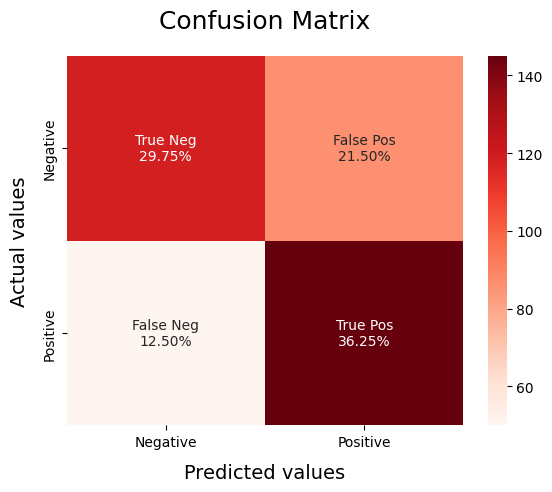

In [49]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

### Random Forest <a id="10"></a>

Accuracy of model on training data : 87.6875
Accuracy of model on testing data : 60.0 

              precision    recall  f1-score   support

           0       0.66      0.44      0.53       205
           1       0.57      0.76      0.65       195

    accuracy                           0.60       400
   macro avg       0.62      0.60      0.59       400
weighted avg       0.62      0.60      0.59       400



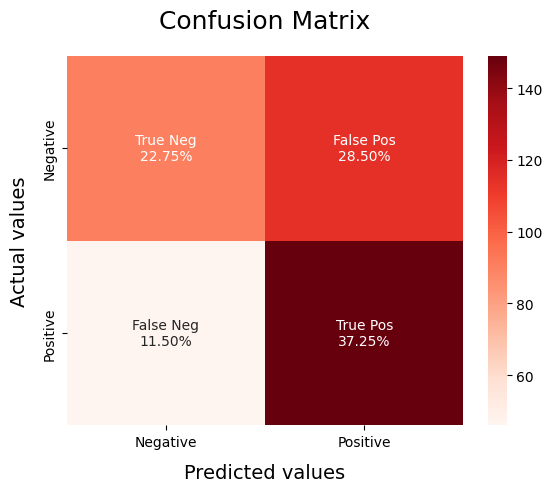

In [50]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

### Naive Bayes <a id="11"></a>

Accuracy of model on training data : 96.875
Accuracy of model on testing data : 67.25 

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       205
           1       0.65      0.70      0.67       195

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400



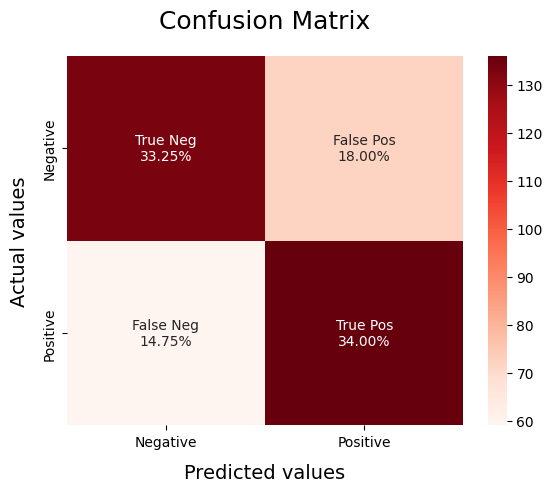

In [51]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# RNN <a id="12"></a>

#### What is RNN?
Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data

#### Embedding Layer
Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks. While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe. Alternatively we can also train our own embeddings using Keras embedding layer.

#### LSTM layer
Long Short Term Memory networks, usually called “LSTMs” , were introduced by Hochreiter and Schmiduber. These have widely been used for speech recognition, language modeling, sentiment analysis and text prediction. Before going deep into LSTM, we should first understand the need of LSTM which can be explained by the drawback of practical use of Recurrent Neural Network (RNN). So, lets start with RNN.

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import re

In [56]:
import keras

In [57]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   36  186  731]
 [   0    0    0 ...  101   16  733]
 [   0    0    0 ... 1603  397 1604]
 ...
 [   0    0    0 ...    0  394   85]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...  154  439  645]]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [59]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])


Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.5081
Epoch 1: val_accuracy improved from -inf to 0.48750, saving model to rnn_model.hdf5
50/50 [==============================] - 13s 185ms/step - loss: 0.6929 - accuracy: 0.5081 - val_loss: 0.6917 - val_accuracy: 0.4875
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.6731 - accuracy: 0.5669
Epoch 2: val_accuracy improved from 0.48750 to 0.57750, saving model to rnn_model.hdf5
50/50 [==============================] - 8s 165ms/step - loss: 0.6731 - accuracy: 0.5669 - val_loss: 0.6730 - val_accuracy: 0.5775
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.5273 - accuracy: 0.8119
Epoch 3: val_accuracy improved from 0.57750 to 0.66000, saving model to rnn_model.hdf5
50/50 [==============================] - 8s 170ms/step - loss: 0.5273 - accuracy: 0.8119 - val_loss: 0.7215 - val_accuracy: 0.6600
Epoch 4/10
50/50 [==============================] - ETA: 0s - loss

In [71]:
data.processed_tweets

15308                       ust joined twitter sooo confused
653778     mcflyharry great song butnot beatles ahn who u...
947920     omfg pirate bay official theme song sweetness ...
185533     oodbye exam hello weekend ive rotten week some...
703746     first ever baby shower ive already asked im ma...
                                 ...                        
550825     gellengail didnt get email school yet cant gro...
334848         joughdee aww sorry whoop exiledgamers website
840527                       ire wire chilling enjoying life
1512012                                         prodbyblackk
397216                    ow ow ow ow press ups hurt sit ups
Name: processed_tweets, Length: 2000, dtype: object

In [72]:
data.processed_tweets.to_csv('Biodata.csv', index=False)

In [73]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
print(sequence)
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
print(pred)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

[[1203, 625, 118]]
1/1 [==============================] - 0s 78ms/step
[[0.38456956]]
Negative


In [61]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 431ms/step
Positive


In [69]:
sequence = tokenizer.texts_to_sequences([' Work is too hectic'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
print(pred)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 64ms/step
[[0.4826386]]
Negative


# Model Saving, Loading and Prediction <a id="13"></a>

In [63]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

### Predict using saved model

In [64]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [65]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [66]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()

    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]

    df = predict(vectoriser, lg, text)
    print(df.head())


                         text sentiment
0     I love machine learning  Positive
1         Work is too hectic.  Negative
2  Mr.Sharama, I feel so good  Positive
